<a href="https://colab.research.google.com/github/danish0511/AI_codes/blob/main/AI_All_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 8 PUZZLE PROBLEM

import sys
import copy

q = []

def compare(s,g):
  if s==g:
    return (1)
  else:
    return (0)

def find_pos(s):
  for i in range(len(s)):
    for j in range(len(s[0])):
      if s[i][j] == 0:
        return([i,j])

def up(s, pos):
  i = pos[0]
  j = pos[1]
  if i > 0:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i-1][j]
    temp[i-1][j] = 0
    return (temp)
  else:
    return (s)

def down(s, pos):
  i = pos[0]
  j = pos[1]
  if i < 2:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i+1][j]
    temp[i+1][j] = 0
    return (temp)
  else:
    return (s)

def left(s, pos):
  i = pos[0]
  j = pos[1]
  if j > 0:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i][j-1]
    temp[i][j-1] = 0
    return (temp)
  else:
    return (s)

def right(s, pos):
  i = pos[0]
  j = pos[1]
  if j < 2:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i][j+1]
    temp[i][j+1] = 0
    return (temp)
  else:
    return (s)

def enqueue(s):
  global q
  q = q + [s]

def dequeue():
  global q
  ele = q[0]
  del q[0]
  return (ele)

def search(s,g):
  curr_state = copy.deepcopy(s)
  if s == g:
    return
  c = 0
  while(1):
    pos = find_pos(curr_state)
    new = up(curr_state, pos)

    if new != curr_state:
      if new == g:
        print('FOUND')
        return
      else:
        enqueue(new)

    new = down(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('FOUND')
        return
      else:
        enqueue(new)

    new = left(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('FOUND')
      else:
        enqueue(new)

    new = right(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('FOUND')
        return
      else:
        enqueue(new)

    if len(q) > 0:
      curr_state = dequeue()
    else:
      print('NOT FOUND')
      return


def main():
  s = [[1,2,3], [8,0,4], [7,6,5]]
  g = [[2,8,1], [0,4,3], [7,6,5]]
  pos = find_pos(s)
  search(s, g)


if __name__ == "__main__":
  main()



FOUND


In [ ]:
## WATER JUG PROBLEM

from collections import defaultdict

jug1, jug2, aim = 4,3,2

visited = defaultdict(lambda: False)

def waterJugSolver(amt1, amt2):
  if (amt1 == aim and amt2 == 0) or (amt2 == aim and amt1 == 0):
    print(amt1, amt2)
    return True

  if visited[(amt1, amt2)] == False:
    print(amt1, amt2)

    visited[(amt1, amt2)] = True

    return (waterJugSolver(0, amt2) or
            waterJugSolver(amt1, 0) or
            waterJugSolver(jug1, amt2) or
            waterJugSolver(amt1, jug2) or
            waterJugSolver(amt1 + min(amt2, (jug1-amt1)), amt2 - min(amt2, (jug1-amt1))) or
            waterJugSolver(amt1 - min(amt1, (jug2-amt2)), amt2 + min(amt1, (jug2-amt2))))

  else:
    return False

print("STEPS: ")
waterJugSolver(0,0)



STEPS: 
0 0
4 0
4 3
0 3
3 0
3 3
4 2
0 2


True

In [ ]:
## TRAVELLING SALESMAN PROBLEM

dist = []
def travel(g, v, pos, n, count, cost):
  if(count == n and g[pos][s]):
    cost += g[pos][s]
    dist.append(cost)
    return
  for i in range(0,n):
    if(v[i] == False and g[pos][i]):
      v[i] = True
      travel(g, v, i, n, count+1, cost+g[pos][i])
      v[i] = False

n = 4
g = [[0,10,15,20], [10,0,35,25], [15,35,0,30], [20,25,30,0]]
s = int(input("Enter a number between 1 and 4: "))
v = [False for i in range(0,n)]
s -= 1
v[s] = True
travel(g,v,s,n,1,0)
print(dist)
print(min(dist))




Enter a number between 1 and 4: 1
[95, 80, 95, 80, 95, 95]
80


In [1]:
## UNIFORM COST SEARCH

import queue as Q

def search(graph, start, end):
  if start not in graph:
    raise TypeError(str(start) + ' not found in graph !')
    return
  if end not in graph:
    raise TypeError(str(end) + ' not found in graph !')
    return
  queue = Q.PriorityQueue()
  queue.put((0, [start]))

  while not queue.empty():
    node = queue.get()
    current = node[1][len(node[1]) - 1]
    print('Current node: ' + str(current))
    if end in node[1]:
      print('Path found: ' + str(node[1]) + ', Cost: ' + str(node[0]))
      break
    cost = node[0]
    for neighbor in graph[current]:
      temp = node[1][:]
      temp.append(neighbor)
      print('Temp Node: ' + str(temp))
      queue.put((cost + graph[current][neighbor], temp))

def main():
  graph = {'S': {'A': 1, 'B': 5, 'C': 15}, 'A': {'S': 1, 'G': 10}, 'B': {'S': 5, 'G': 5}, 'C': {'S': 15, 'G':5}, 'G': {'A': 10, 'B': 5, 'C': 5}}
  search(graph, 'S', 'G')

if __name__ == '__main__':
  main()


Current node: S
Temp Node: ['S', 'A']
Temp Node: ['S', 'B']
Temp Node: ['S', 'C']
Current node: A
Temp Node: ['S', 'A', 'S']
Temp Node: ['S', 'A', 'G']
Current node: S
Temp Node: ['S', 'A', 'S', 'A']
Temp Node: ['S', 'A', 'S', 'B']
Temp Node: ['S', 'A', 'S', 'C']
Current node: A
Temp Node: ['S', 'A', 'S', 'A', 'S']
Temp Node: ['S', 'A', 'S', 'A', 'G']
Current node: S
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'B']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'C']
Current node: A
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'G']
Current node: B
Temp Node: ['S', 'B', 'S']
Temp Node: ['S', 'B', 'G']
Current node: S
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S', 'A']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S', 'B']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S', 'C']
Current node: A
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S', 'A', 'S']
Temp Node: ['S', 'A', 'S', 'A', 'S', 'A', 'S', 'A', 'G']
Current node: B
Temp N

In [2]:
## BEST FIRST SEARCH  - 8 PUZZLE PROBLEM

import sys
import copy

q = []
visited = []

def compare(s,g):
  if s==g:
    return(1)
  else:
    return(0)

def find_pos(s):
  for i in range(3):
    for j in range(3):
      if s[i][j] == 0:
        return ([i,j])

def up(s, pos):
  i = pos[0]
  j = pos[1]
  if i > 0:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i-1][j]
    temp[i-1][j] = 0
    return (temp)
  else:
    return (s)

def down(s, pos):
  i = pos[0]
  j = pos[1]
  if i < 2:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i+1][j]
    temp[i+1][j] = 0
    return (temp)
  else:
    return (s)

def left(s, pos):
  i = pos[0]
  j = pos[1]
  if j > 0:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i][j-1]
    temp[i][j-1] = 0
    return (temp)
  else:
    return (s)

def right(s, pos):
  i = pos[0]
  j = pos[1]
  if j < 2:
    temp = copy.deepcopy(s)
    temp[i][j] = temp[i][j+1]
    temp[i][j+1] = 0
    return (temp)
  else:
    return (s)

def enqueue(s, val):
  global q
  q = q + [(val,s)]

def heuristic(s,g):
  d = 0
  for i in range(3):
    for j in range(3):
      if s[i][j] != g[i][j]:
        d += 1
  return d

def dequeue():
  global q
  global visited
  q.sort()
  visited = visited + [q[0][1]]
  ele = q[0][1]
  del q[0]
  return (ele)

def search(s,g):
  curr_state = copy.deepcopy(s)
  if s== g:
    return
  global visited
  while(1):
    pos = find_pos(curr_state)

    new = up(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('Found! The intermediate states are:')
        print(visited + [g])
        return
      else:
        if new not in visited:
          enqueue(new, heuristic(new,g))

    new = down(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('Found! The intermediate states are: ')
        print(visited + [g])
        return
      else:
        if new not in visited:
          enqueue(new, heuristic(new,g))

    new = left(curr_state, pos)
    if new != curr_state:
      if new == g:
        print('Found! The intermediate states are: ')
        print(visited + [g])
        return
      else:
        if new not in visited:
          enqueue(new, heuristic(new,g))

    new = right(curr_state,pos)
    if new != curr_state:
      if new == g:
        print('Found! The intermediate states are: ')
        print(visited + [g])
        return
      else:
        if new not in visited:
          enqueue(new, heuristic(new,g))

    if len(q) > 0:
      curr_state = dequeue()
    else:
      print('Not Found!')
      return

def main():
  s = [[2,0,3],[1,8,4],[7,6,5]]
  g = [[1,2,3],[8,0,4],[7,6,5]]
  global q
  global visited
  q = q
  visited = visited + [s]
  search(s,g)

if __name__ == '__main__':
  main()






Found! The intermediate states are: 
[[[2, 0, 3], [1, 8, 4], [7, 6, 5]], [[0, 2, 3], [1, 8, 4], [7, 6, 5]], [[1, 2, 3], [0, 8, 4], [7, 6, 5]], [[1, 2, 3], [8, 0, 4], [7, 6, 5]]]


In [1]:
## HILL CLIMBING ALGORITHM - 8 PUZZLE PROBLEM

import sys
import copy

curr_min = sys.maxsize
q = []
visited = []

def compare(s,g):
    if s==g:
        return(1)
    else:
        return(0)

def find_pos(s):
  for i in range(3):
    for j in range(3):
      if s[i][j] == 0:
        return ([i,j])


def up(s,pos):
    i = pos[0]
    j = pos[1]
    if i > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i-1][j]
        temp[i-1][j] = 0
        return (temp)
    else:
        return (s)


def down(s,pos):
    i = pos[0]
    j = pos[1]
    if i < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i+1][j]
        temp[i+1][j] = 0
        return (temp)
    else:
        return (s)


def right(s,pos):
    i = pos[0]
    j = pos[1]
    if j < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j+1]
        temp[i][j+1] = 0
        return (temp)
    else:
        return (s)

def left(s,pos):
    i = pos[0]
    j = pos[1]
    if j > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j-1]
        temp[i][j-1] = 0
        return (temp)
    else:
        return (s)

def enqueue(s):
    global q
    q = q + [s]
def heuristic(s,g):
    d = 0
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] != g[i][j]:
                d += 1
    return d

def dequeue(g):
    h = []
    global q
    global visited
    global curr_min
    for i in range(len(q)):
        h = h + [heuristic(q[i],g)]
    if min(h) < curr_min:
        curr_min = min(h)
        index = h.index(min(h))
        visited = visited + [q[index]]
        elem = q[index]
        q = []
        return (elem)
    else:
        print ("optimal solution found !! The intermediate states are: ")
        print (visited)
        exit()


def search(s,g):
    curr_state = copy.deepcopy(s)
    if s == g:
        return
    global visited
    while(1):
        pos = find_pos(curr_state)

        new = up(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        new = down(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        new = right(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        new = left(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("Goal State found !! The intermediate States are :")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new)

        if len(q) > 0:
            curr_state = dequeue(g)
        else:
            print ("not found")
            return

def main():
    s = [[2,8,3],[1,5,4],[7,6,0]]
    g = [[1,2,7],[8,0,5],[3,4,6]]
    global q
    global visited
    q = q + [s]
    visited = visited + [s]
    search(s,g)

if __name__ == "__main__":
    main()

optimal solution found !! The intermediate states are: 
[[[2, 8, 3], [1, 5, 4], [7, 6, 0]], [[2, 8, 3], [1, 5, 4], [7, 0, 6]], [[2, 8, 3], [1, 0, 4], [7, 5, 6]]]


TypeError: 'NoneType' object is not subscriptable

In [6]:
## A* ALGORITHM -  8 PUZZLE PROBLEM

import sys
import copy

q = []
visited = []

def compare(s,g):
    if s==g:
        return(1)
    else:
        return(0)

def find_pos(s):
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] == 0:
                return([i,j])


def up(s,pos):
    i = pos[0]
    j = pos[1]
    if i > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i-1][j]
        temp[i-1][j] = 0
        return (temp)
    else:
        return (s)

def down(s,pos):
    i = pos[0]
    j = pos[1]
    if i < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i+1][j]
        temp[i+1][j] = 0
        return (temp)
    else:
        return (s)

def right(s,pos):
    i = pos[0]
    j = pos[1]
    if j < 2:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j+1]
        temp[i][j+1] = 0
        return (temp)
    else:
        return (s)

def left(s,pos):
    i = pos[0]
    j = pos[1]
    if j > 0:
        temp = copy.deepcopy(s)
        temp[i][j] = temp[i][j-1]
        temp[i][j-1] = 0
        return (temp)
    else:
        return (s)

def enqueue(s,val):
    global q
    q = q + [(val,s)]

def g_val(s,curr_state):
    d = 0
    for i in range(3):
        for j in range(3):
            if s[i][j] != curr_state[i][j]:
                d += 1
    return d

def h_val(g,curr_state):

    d = 0
    for i in range(3):
        for j in range(3):
            if curr_state[i][j] != g[i][j]:
                d += 1
    return d

def heuristic_val(s,curr_state,g):
    heur_val = g_val(s,curr_state) + h_val(g,curr_state)
    return heur_val

def dequeue(g,s):
    global q
    global visited
    q.sort()
    elem = q[0][1]
    visited = visited + [q[0][1]]
    del q[0]
    return (elem)

def search(s,g):
    curr_state = copy.deepcopy(s)
    if s == g:
        return
    global visited
    while(1):
        pos = find_pos(curr_state)
        new = up(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = down(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = right(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        new = left(curr_state,pos)
        if new != curr_state:
            if new == g:
                print ("found!! The intermediate states are:")
                print (visited + [g])
                return
            else:
                if new not in visited:
                    enqueue(new,heuristic_val(s,new,g))

        if len(q) > 0:
            curr_state = dequeue(g,s)
        else:
            print ("not found")
            return

def main():

    s = [[2,0,3],[1,8,4],[7,6,5]]
    g = [[1,2,3],[8,0,4],[7,6,5]]
    global q
    global visited
    q = q
    visited = visited + [s]

    search(s,g)

if __name__ == "__main__":
    main()



found!! The intermediate states are:
[[[2, 0, 3], [1, 8, 4], [7, 6, 5]], [[0, 2, 3], [1, 8, 4], [7, 6, 5]], [[1, 2, 3], [0, 8, 4], [7, 6, 5]], [[1, 2, 3], [8, 0, 4], [7, 6, 5]]]


In [10]:
## AO* ALGORITHM - TREE

graph={'A':[['B', 'C'], ['D']],
       'B':[['G'], ['H']],
       'D':[['E','F']]}

node_cost={'B':6, 'C':12, 'D':10, 'E':4, 'F':4, 'G':5, 'H':7}

edge_cost=1

head_node='A'

def solve(currs):
  flag=0
  for curr in currs:
    if curr in graph.keys():
      flag=1
  if not flag:
    return 0
  min_cost=1000000
  for curr in currs:
    if curr in graph.keys():
      for path in graph[curr]:
        cost=0
        for node in path:
          cost=cost + node_cost[node]+edge_cost
          if min_cost>cost:
            min_cost=cost
            next_nodes=path
  print(f"{next_nodes}, {min_cost}")
  return [next_nodes, min_cost]

def driver():
  cost=0
  curr = head_node
  moves=0
  while True:
    for node in curr:
      result=solve(node)
      if not result:
        print(f"moves:{moves}")
        print(f"cost:{cost}")
        return cost
      cost += result[1]
      curr = result[0]
    moves += 1

if __name__=="__main__":
  driver()


['B', 'C'], 7
['G'], 6
moves:1
cost:13


In [1]:
## STEEPEST HILL CLIMBING

import copy

steps = 0

s = [[1,2,3],[8,0,4],[7,6,5]]
g = [[2,0,3],[1,8,4],[7,6,5]]

visited = []

def compare(curr):
  return curr == g

def blankTile(s):
  for i in range(len(s)):
    for j in range(len(s[0])):
      if s[i][j] == 0:
        return [i,j]
  return -1

def up(curr):
  i,j = blankTile(curr)
  if (i==0):
    return curr
  temp = copy.deepcopy(curr)
  temp[i-1][j], temp[i][j] = temp[i][j], temp[i-1][j]
  return temp

def down(curr):
  i,j = blankTile(curr)
  if (i == len(curr)-1):
    return curr
  temp = copy.deepcopy(curr)
  temp[i][j], temp[i+1][j] = temp[i+1][j], temp[i][j]
  return temp

def left(curr):
  i,j = blankTile(curr)
  if (j == 0):
    return curr
  temp = copy.deepcopy(curr)
  temp[i][j], temp[i][j-1] = temp[i][j-1], temp[i][j]
  return temp

def right(curr):
  i,j = blankTile(curr)
  if (j == len(curr[0]) - 1):
    return curr
  temp = copy.deepcopy(curr)
  temp[i][j], temp[i][j+1] = temp[i][j+1], temp[i][j]
  return temp

def heuristic(s):
  h_val = 0
  for i in range(len(s)):
    for j in range(len(s[0])):
      if s[i][j] != g[i][j]:
        h_val += 1
  return h_val

def getStates(curr):
  states = []
  states.append(left(curr))
  states.append(right(curr))
  states.append(up(curr))
  states.append(down(curr))
  arr = []
  for i in states:
    if (i not in visited):
      arr.append(i)
  if (len(arr) == 0):
    return -1
  heuristic_array = []
  for i in arr:
    heuristic_array.append(heuristic(i))
  ind = heuristic_array.index(min(heuristic_array))
  return arr[ind]
  states = []
  states.append(up(curr))
  states.append(down(curr))
  states.append(left(curr))
  states.append(right(curr))
  arr = []
  for i in states:
    if (i not in visited):
      arr.append(i)
  if(len(arr) == 0):
    return -1
  return min(arr)

def display(state):
  for i in state:
    for j in i:
      print(j, end='')
    print()
  print()

def eightPuzzle():
  if compare(s):
    return s
  curr = s
  global steps
  while(compare(curr)==0):
    steps += 1
    print('Step ', steps)
    display(curr)
    visited.append(curr)
    curr = getStates(curr)
    if (curr == -1):
      return "No Solution"
  return curr

eightPuzzle()
print('The total number of steps are: ', steps)



Step  1
123
804
765

Step  2
123
084
765

Step  3
023
184
765

The total number of steps are:  3


In [7]:
## SIMPLE HILL CLIMBING

import copy

steps = 0

s = [[1,2,3],[8,0,4],[7,6,5]]
g = [[2,0,3],[1,8,4],[7,6,5]]

visited = []

def compare(curr):
    return curr == g

def blankTile(s):
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] == 0:
                return [i,j]
    return -1

def up(curr):
    i,j = blankTile(curr)
    if(i==0):
        return curr
    temp = copy.deepcopy(curr)
    temp[i-1][j],temp[i][j] = temp[i][j],temp[i-1][j]
    return temp

def down(curr):
    i,j = blankTile(curr)
    if (i == len(curr)-1):
        return curr
    temp = copy.deepcopy(curr)
    temp[i][j],temp[i+1][j] = temp[i+1][j],temp[i][j]
    return temp

def left(curr):
    i,j = blankTile(curr)
    if (j == 0):
        return curr
    temp = copy.deepcopy(curr)
    temp[i][j],temp[i][j-1] = temp[i][j-1],temp[i][j]
    return temp

def right(curr):
    i,j = blankTile(curr)
    if (j == len(curr[0])-1):
        return curr
    temp = copy.deepcopy(curr)
    temp[i][j],temp[i][j+1] = temp[i][j+1],temp[i][j]
    return temp

def heuristic(s):
    h_val = 0
    for i in range(len(s)):
        for j in range(len(s[0])):
            if s[i][j] == g[i][j] :
                h_val +=1
    return h_val

def getStates(curr):

    heuristic_now = heuristic(curr)

    if(heuristic_now <= heuristic(left(curr)) and left(curr) not in visited ):
        return left(curr)
    if(heuristic_now <= heuristic(down(curr)) and down(curr) not in visited ):
        return down(curr)
    if(heuristic_now <= heuristic(up(curr)) and up(curr) not in visited ):
        return up(curr)
    if(heuristic_now <= heuristic(right(curr)) and right(curr) not in visited ):
        return right(curr)

    return -1
def display(state):
    for i in state:
        for j in i:
            print(j, end='')
        print()
    print()

def EightPuzzle():
    if compare(s):
        return s
    curr = s
    global steps

    while(compare(curr)==0):
            steps+=1
            print("step ",steps)
            display(curr)
            visited.append(curr)
            curr = getStates(curr)
            if (curr == -1):
                return "no solution"
    return curr

EightPuzzle()
print("The total number of steps are: ",steps)

step  1
123
804
765

step  2
123
084
765

step  3
023
184
765

The total number of steps are:  3


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
[5.1 3.5 1.4 0.2]
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
['versicolor']


<ipython-input-8-612d491557f5>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('RdYlBu',3))


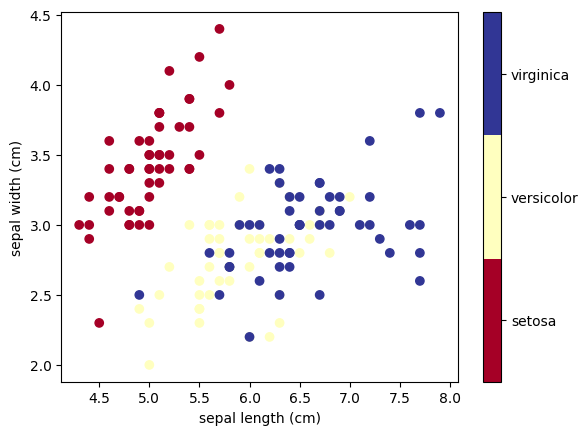

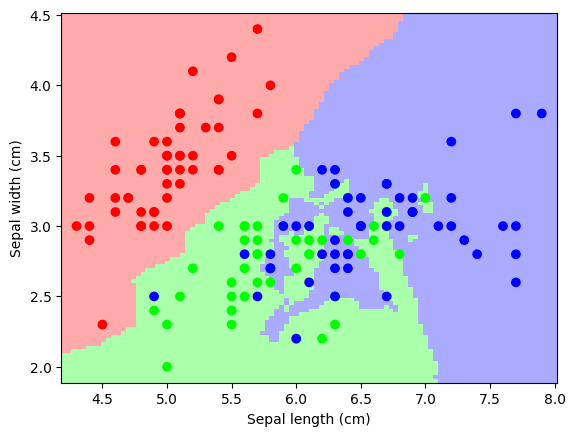

In [8]:
## KNN

import numpy as np
from sklearn import datasets
from sklearn import neighbors
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()
print(iris.keys())

n_samples, n_features = iris.data.shape
print((n_samples, n_features))

print(iris.data[0])

print(iris.target.shape)

print(iris.target)
print(iris.target_names)

x_index = 0
y_index = 1
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:,x_index],
            iris.data[:, y_index],
            c=iris.target,
            cmap=plt.cm.get_cmap('RdYlBu',3))
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

X, y = iris.data, iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X,y)

result = clf.predict([[3,5,4,2],])
print(iris.target_names[result])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
def plot_iris_knn():
  iris = datasets.load_iris()
  X = iris.data[:, :2]
  y = iris.target
  knn = neighbors.KNeighborsClassifier(n_neighbors=3)
  knn.fit(X,y)
  x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
  y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
  Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)
  pl.figure()
  pl.pcolormesh(xx,yy,Z,cmap=cmap_light)
  pl.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
  pl.xlabel('Sepal length (cm)')
  pl.ylabel('Sepal width (cm)')
  pl.axis('tight')
plot_iris_knn()



In [9]:
## NAIVE BAYES

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X, y = load_iris(return_X_y =True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total points: ", ((y_test != y_pred).sum(), X_test.shape[0]))



Number of mislabeled points out of a total points:  (4, 75)


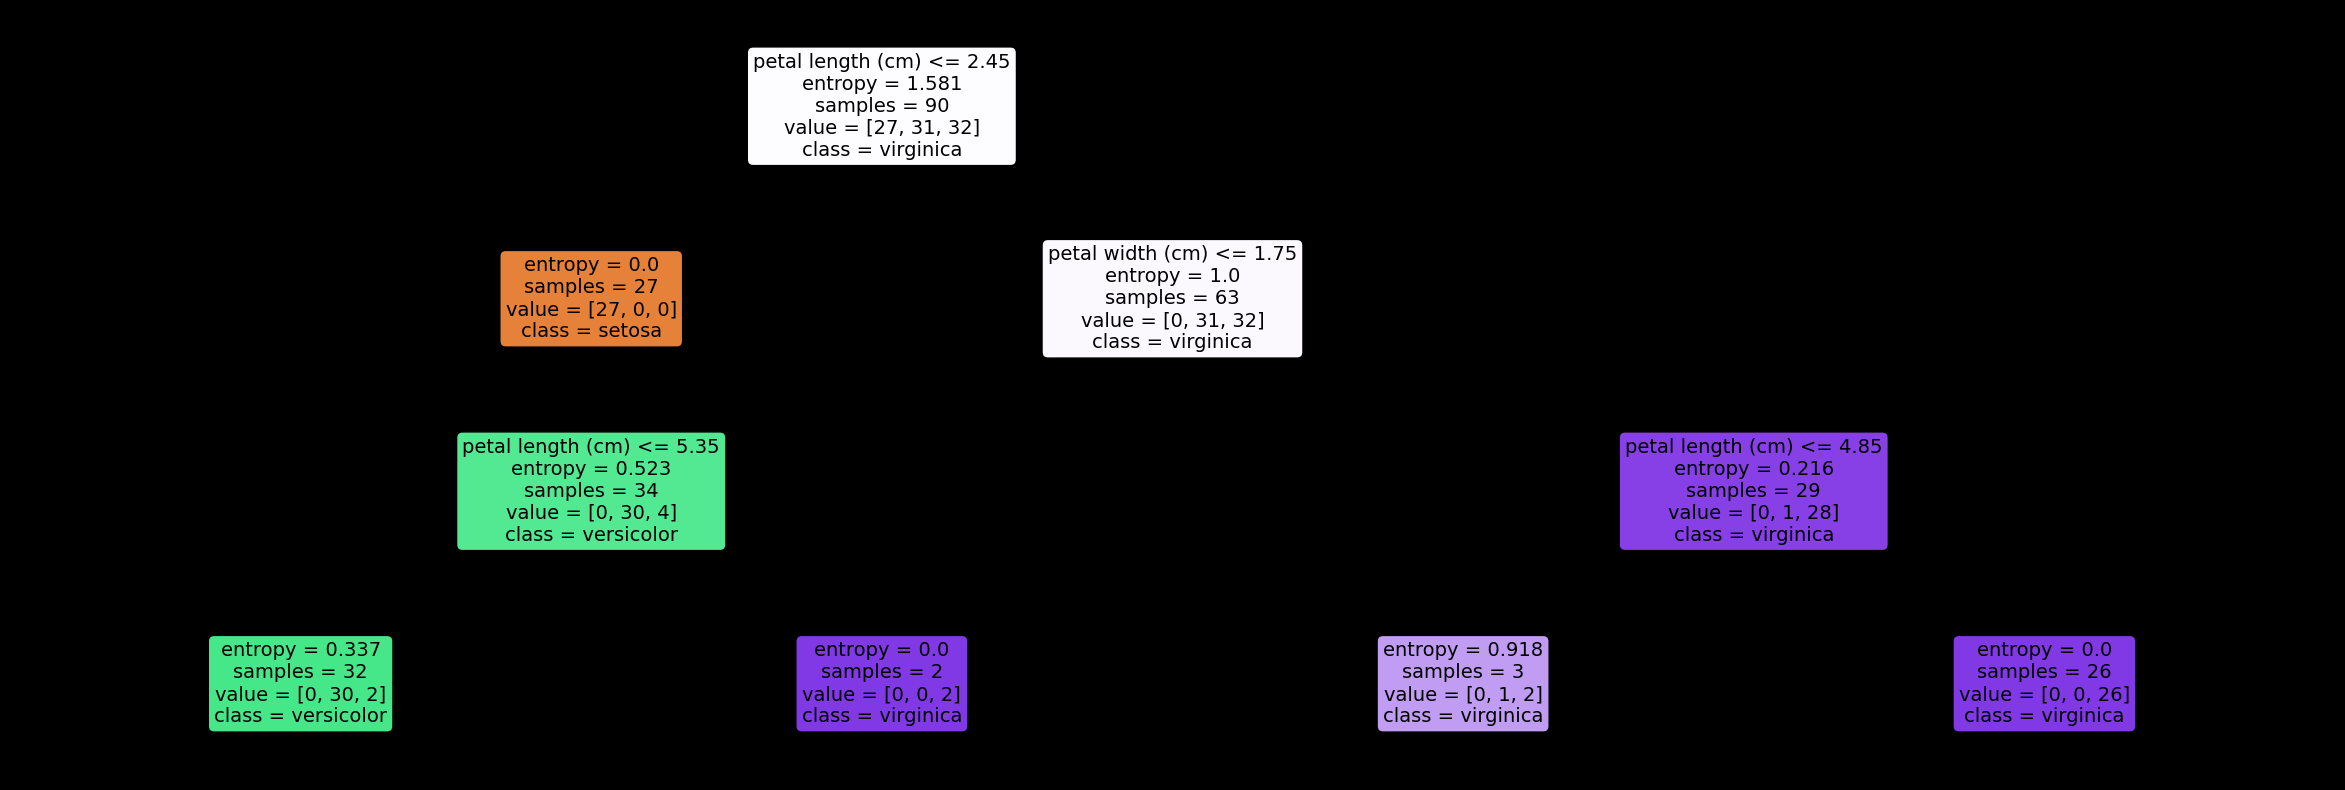

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



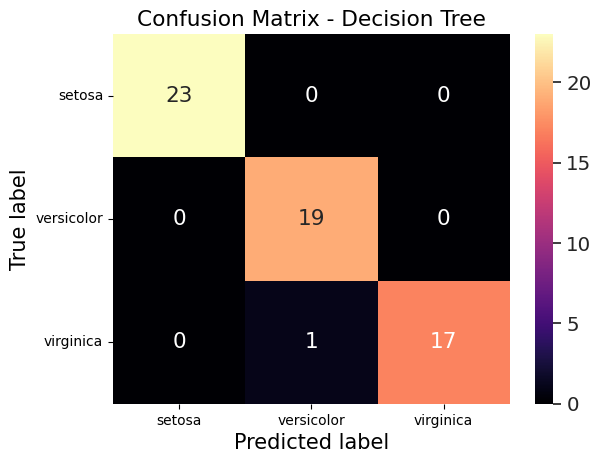

<Figure size 1000x700 with 0 Axes>

In [11]:
## DECISION TREE

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

df['Species'] = data.target
df.head()

target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)

x = df.drop(columns = 'Species')
y = df['Species']
feature_names = x.columns
labels = y.unique()

from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(x,y,test_size=0.4, random_state=42)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10),facecolor='k')
a = tree.plot_tree(clf,feature_names=feature_names,
                   class_names= labels,
                   rounded = True,
                   filled = True,
                   fontsize =14)
plt.show()

from sklearn.tree import export_text
tree_rules = export_text(clf,feature_names = list(feature_names))
print(tree_rules)

test_pred_decision_tree = clf.predict(test_x)

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel('Predicted label', fontsize=15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel('True label', fontsize=15)
ax.set_yticklabels(list(labels), rotation=0)
plt.show()



